In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import random

from scipy import eye, asarray, dot, sum, diag
from scipy.linalg import svd
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid


import PCA_functions as pf
import Extreme_functions as ef

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp

from Data import Data
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation

import scipy.stats as st

import reverse_geocoder as rg

from pandas_datareader import wb
import scipy.stats as st

import Rung as rung

from pandas_datareader import wb

import seaborn as sns


import seaborn as sns
import feature_finder_keiko as ff
import feature_finder_f as ff1

from scipy import signal

plt.rcParams["figure.figsize"] = (20,10)

In [3]:
def timeseries_enso(file_name, start_year = 1950, end_year=2015, base_year = 1950):
    start_index = (start_year - base_year) * 12   
    end_index = start_index + (end_year - (start_year - 1))*12
    data = np.load(file_name)
    return(data[start_index:end_index])

In [3]:
nino = np.load('nino.npy')
oni = np.load('oni.npy')

In [4]:
nino = ff.timeseries_enso('nino.npy', start_year = 1950, end_year=1951)

In [21]:
step = 1
train_start = np.arange(1950,1977,step)
#train_end = np.arange(1955,2006,step)
validation_end = np.arange(1984,2011,step)
test_start = np.arange(1985,2012,step)
test_end = np.arange(1989,2016,step)

In [22]:
f =12

In [23]:
train_start = 1976
validation_end = 2010
test_start = 2011
test_end = 2015
tau = 12
ratio = 0.8
n_estimators=100
max_depth=5

In [2]:
step = 1
train_start = np.arange(1948,1977,step)
#train_end = np.arange(1955,2006,step)
validation_end = np.arange(1982,2011,step)
test_start = np.arange(1983,2012,step)
test_end = np.arange(1987,2016,step)

f = 12
taus = np.arange(1,13,1)
cc = 'ET'

In [8]:
tau = 1

In [6]:
for tau in taus:
    base_result = []
    model_results= []
    base_p = []
    model_p = []
    for ijz in range(len(train_start)):
        temporal_limits = {"time_min":datetime(train_start[ijz], 1, 1, 0, 0),"time_max":datetime(validation_end[ijz], 12, 1, 0, 0)}
        original_count, count = ff.drought_timeseries("{}_gamma_18912015_{}.npy".format(cc,f),train_start[ijz],validation_end[ijz])
        enso = ff.timeseries_enso('nino.npy',train_start[ijz],validation_end[ijz])
        print(tau)
        best_link, base_model, model = ff.forward_feature_enso(original_count, enso, tau=tau, ratio=0.8)
        #np.save("./best_link_enso/pcmci_{}_{}_{}_{}_{}.npy".format(f,train_start[ijz],validation_end[ijz],tau,n_components_sst[ijz]), best_link)



1


ValueError: Found array with 0 sample(s) (shape=(0, 13)) while a minimum of 1 is required.

In [2]:
train_start = 1948

In [3]:
validation_end = 1982

In [4]:
tau = 1

In [10]:
def timeseries_enso(file_name, start_year = 1948, end_year=2015, base_year = 1948):
    start_index = (start_year - base_year) * 12   
    end_index = start_index + (end_year - (start_year - 1))*12
    data = np.load(file_name)
    return(data[start_index:end_index])

In [31]:
temporal_limits = {"time_min":datetime(train_start, 1, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}
count, _ = ff.drought_timeseries("ET_gamma_18912015_12.npy",train_start,validation_end)
enso = timeseries_enso('nino.npy',train_start,validation_end)

In [32]:
enso

array([26.63, 27.13, 27.89, 28.02, 28.17, 27.75, 27.16, 26.85, 26.73,
       26.06, 26.35, 26.96, 26.12, 27.02, 26.7 , 27.96, 27.79, 26.97,
       26.84, 26.56, 26.1 , 26.01, 25.33, 25.39, 25.53, 25.26, 26.18,
       26.86, 26.56, 26.82, 26.14, 26.24, 25.65, 25.9 , 25.27, 25.55,
       25.45, 26.02, 26.48, 27.6 , 27.77, 27.6 , 27.88, 27.77, 27.42,
       27.52, 27.44, 27.3 , 26.97, 27.  , 27.3 , 28.18, 27.48, 27.03,
       26.63, 26.45, 26.4 , 26.7 , 26.33, 26.04, 26.94, 27.  , 27.48,
       28.54, 28.21, 28.1 , 27.42, 26.91, 27.42, 26.84, 26.96, 26.74,
       26.97, 26.98, 27.27, 27.45, 27.34, 26.88, 26.2 , 25.8 , 25.72,
       25.82, 25.49, 25.79, 25.92, 25.98, 26.46, 26.82, 26.64, 26.49,
       25.91, 25.96, 25.42, 25.14, 24.75, 25.07, 25.35, 25.79, 26.32,
       26.99, 27.28, 26.85, 26.28, 26.06, 25.84, 26.04, 25.64, 26.01,
       26.02, 26.52, 27.34, 28.19, 28.31, 28.22, 27.91, 27.66, 27.28,
       27.48, 27.74, 27.76, 28.12, 28.16, 28.25, 28.08, 28.19, 27.99,
       27.26, 27.12,

In [15]:
best_link, base_model, model = ff.forward_feature_enso(count, enso, tau=tau, ratio=0.8)

ValueError: Found array with 0 sample(s) (shape=(0, 13)) while a minimum of 1 is required.

In [6]:
ratio = 0.8
n_estimators=100
max_depth=5

In [9]:
    result = []
    link_list = []
    start_lag = tau
    end_lag = tau + 11
    df = pd.DataFrame({"drought":count})

    df = ff.shift_df(df, start_lag, end_lag)
    index = int(df.shape[0]*ratio)
    dim = df.shape[1]
    x_train, x_test = df.iloc[:index,1:dim], df.iloc[index:,1:dim]
    y_train, y_test = df.iloc[:index,0], df.iloc[index:,0]
    base_model = RandomForestRegressor(max_depth=max_depth, random_state=0, n_estimators=n_estimators)
    base_model.fit(x_train, y_train)
    y_pred = base_model.predict(x_test)
    result.append(mean_squared_error(y_pred, y_test))


In [11]:
    df_count = pd.DataFrame({"drought": count})
    lags = np.arange(start_lag,end_lag + 1)
    df_count = df_count.assign(**{
    '{} (t-{})'.format(col, t): df_count[col].shift(t)
    for t in lags
    for col in df_count
    })

In [7]:



    df_enso = pd.DataFrame({"enso": enso})
    lags = np.arange(start_lag,end_lag + 1)
    df_enso = df_enso.assign(**{
    '{} (t-{})'.format(col, t): df_enso[col].shift(t)
    for t in lags
    for col in df_enso
    })

    df_enso = df_enso.drop(['enso'],1)

    df = pd.concat([df_count, df_enso],axis=1)
    df = df.dropna()

In [8]:
df

,drought,drought (t-1),drought (t-2),drought (t-3),drought (t-4),drought (t-5),drought (t-6),drought (t-7),drought (t-8),drought (t-9),...,enso (t-3),enso (t-4),enso (t-5),enso (t-6),enso (t-7),enso (t-8),enso (t-9),enso (t-10),enso (t-11),enso (t-12)


In [23]:
enso

array([], dtype=float64)

In [ ]:
def forward_feature_enso(count, enso, tau, ratio = 0.8, n_estimators=100, max_depth=5):
    result = []
    link_list = []
    start_lag = tau
    end_lag = tau + 11
    df = pd.DataFrame({"drought":count})

    df = shift_df(df, start_lag, end_lag)
    index = int(df.shape[0]*ratio)
    dim = df.shape[1]
    x_train, x_test = df.iloc[:index,1:dim], df.iloc[index:,1:dim]
    y_train, y_test = df.iloc[:index,0], df.iloc[index:,0]
    base_model = RandomForestRegressor(max_depth=max_depth, random_state=0, n_estimators=n_estimators)
    base_model.fit(x_train, y_train)
    y_pred = base_model.predict(x_test)
    result.append(mean_squared_error(y_pred, y_test))

    df_count = pd.DataFrame({"drought": count})
    lags = np.arange(start_lag,end_lag + 1)
    df_count = df_count.assign(**{
    '{} (t-{})'.format(col, t): df_count[col].shift(t)
    for t in lags
    for col in df_count
    })

    df_enso = pd.DataFrame({"enso": enso})
    lags = np.arange(start_lag,end_lag + 1)
    df_enso = df_enso.assign(**{
    '{} (t-{})'.format(col, t): df_enso[col].shift(t)
    for t in lags
    for col in df_enso
    })

    df_enso = df_enso.drop(['enso'],1)

    df = pd.concat([df_count, df_enso],axis=1)
    df = df.dropna()

    base = df.iloc[:,:13].copy()
    features = df.iloc[:,13:].copy()

    while features.shape[1]>0:
        min_mse = np.Inf
        min_index = 0
        for c in features.columns:
            mse = feature_score(base, features[c])
            if (result[-1] > mse) and (min_mse > mse):
                min_mse = mse
                min_index = c
        if isinstance(min_index, int): break
        result.append(min_mse)
        base = pd.concat([base, features[min_index]],axis=1)
        features = features.drop(min_index,1)
        link_list.append(min_index)

    if len(link_list) > 0:        
        x_train = base.iloc[:,1:]
        y_train = base.iloc[:,0]
        model = RandomForestRegressor(max_depth=max_depth, random_state=0, n_estimators=n_estimators)
        model.fit(x_train, y_train)
    else:
        model = base_model
        link_list = []

In [13]:
temporal_limits = {"time_min":datetime(test_start, 1, 1, 0, 0),"time_max":datetime(test_end, 12, 1, 0, 0)}
count_test, _ = ff.drought_timeseries("ET_gamma_18912015_12.npy",test_start,test_end)
enso = ff.timeseries_enso('nino.npy',test_start,test_end)

In [14]:
y_pred_base, y_test_base = ff.base_model_result(count_test, base_model, best_link, tau)
y_pred, y_test = ff.model_result_enso(count_test, enso, best_link, model,tau)

In [16]:
mean_squared_error(y_pred, y_test)

3356.5698575925126

In [17]:
mean_squared_error(y_pred_base, y_test_base)

3349.6879572293483

In [67]:
result = []
link_list = []
start_lag = tau
end_lag = tau + 11
df = pd.DataFrame({"drought":count})

df = ff.shift_df(df, start_lag, end_lag)
index = int(df.shape[0]*ratio)
dim = df.shape[1]
x_train, x_test = df.iloc[:index,1:dim], df.iloc[index:,1:dim]
y_train, y_test = df.iloc[:index,0], df.iloc[index:,0]
base_model = RandomForestRegressor(max_depth=max_depth, random_state=0, n_estimators=n_estimators)
base_model.fit(x_train, y_train)
y_pred = base_model.predict(x_test)
result.append(mean_squared_error(y_pred, y_test))

In [68]:
df_count = pd.DataFrame({"drought": count})
lags = np.arange(start_lag,end_lag + 1)
df_count = df_count.assign(**{
'{} (t-{})'.format(col, t): df_count[col].shift(t)
for t in lags
for col in df_count
})

df_enso = pd.DataFrame({"enso": enso})
lags = np.arange(start_lag,end_lag + 1)
df_enso = df_enso.assign(**{
'{} (t-{})'.format(col, t): df_enso[col].shift(t)
for t in lags
for col in df_enso
})

df_enso = df_enso.drop(['enso'],1)

df = pd.concat([df_count, df_enso],axis=1)
df = df.dropna()

In [70]:
base = df.iloc[:,:13].copy()
features = df.iloc[:,13:].copy()

In [71]:
while features.shape[1]>0:
    min_mse = np.Inf
    min_index = 0
    for c in features.columns:
        mse = ff.feature_score(base, features[c])
        if (result[-1] > mse) and (min_mse > mse):
            min_mse = mse
            min_index = c
    if isinstance(min_index, int): break
    result.append(min_mse)
    base = pd.concat([base, features[min_index]],axis=1)
    features = features.drop(min_index,1)
    link_list.append(min_index)

In [72]:
link_list

['enso (t-13)', 'enso (t-14)']

In [73]:
if len(link_list) > 0:        
    x_train = base.iloc[:,1:]
    y_train = base.iloc[:,0]
    model = RandomForestRegressor(max_depth=max_depth, random_state=0, n_estimators=n_estimators)
    model.fit(x_train, y_train)
else:
    model = base_model
    link_list = []

In [75]:
start_lag = tau
end_lag = tau + 11

df = pd.DataFrame({"drought":count})
lags = np.arange(start_lag,end_lag + 1)
df = df.assign(**{
'{} (t-{})'.format(col, t): df[col].shift(t)
for t in lags
for col in df
})

In [86]:
def forward_feature_enso(count, enso, tau, ratio = 0.8, n_estimators=100, max_depth=5):
    result = []
    link_list = []
    start_lag = tau
    end_lag = tau + 11
    df = pd.DataFrame({"drought":count})

    df = ff.shift_df(df, start_lag, end_lag)
    index = int(df.shape[0]*ratio)
    dim = df.shape[1]
    x_train, x_test = df.iloc[:index,1:dim], df.iloc[index:,1:dim]
    y_train, y_test = df.iloc[:index,0], df.iloc[index:,0]
    base_model = RandomForestRegressor(max_depth=max_depth, random_state=0, n_estimators=n_estimators)
    base_model.fit(x_train, y_train)
    y_pred = base_model.predict(x_test)
    result.append(mean_squared_error(y_pred, y_test))

    df_count = pd.DataFrame({"drought": count})
    lags = np.arange(start_lag,end_lag + 1)
    df_count = df_count.assign(**{
    '{} (t-{})'.format(col, t): df_count[col].shift(t)
    for t in lags
    for col in df_count
    })

    df_enso = pd.DataFrame({"enso": enso})
    lags = np.arange(start_lag,end_lag + 1)
    df_enso = df_enso.assign(**{
    '{} (t-{})'.format(col, t): df_enso[col].shift(t)
    for t in lags
    for col in df_enso
    })

    df_enso = df_enso.drop(['enso'],1)

    df = pd.concat([df_count, df_enso],axis=1)
    df = df.dropna()

    base = df.iloc[:,:13].copy()
    features = df.iloc[:,13:].copy()

    while features.shape[1]>0:
        min_mse = np.Inf
        min_index = 0
        for c in features.columns:
            mse = ff.feature_score(base, features[c])
            if (result[-1] > mse) and (min_mse > mse):
                min_mse = mse
                min_index = c
        if isinstance(min_index, int): break
        result.append(min_mse)
        base = pd.concat([base, features[min_index]],axis=1)
        features = features.drop(min_index,1)
        link_list.append(min_index)

    if len(link_list) > 0:        
        x_train = base.iloc[:,1:]
        y_train = base.iloc[:,0]
        model = RandomForestRegressor(max_depth=max_depth, random_state=0, n_estimators=n_estimators)
        model.fit(x_train, y_train)
    else:
        model = base_model
        link_list = []
    
    return(np.array(link_list),base_model, model)

In [85]:
def model_result_enso(count, enso, link, model, tau=1, n_estimators=100, max_depth=5):
    if len(link) > 0:
        start_lag = tau
        end_lag = tau + 11

        df = pd.DataFrame({"drought":count})
        lags = np.arange(start_lag,end_lag + 1)
        df = df.assign(**{
        '{} (t-{})'.format(col, t): df[col].shift(t)
        for t in lags
        for col in df
        })
        
        df_enso = pd.DataFrame({"enso": enso})
        lags = np.arange(start_lag,end_lag + 1)
        df_enso = df_enso.assign(**{
        '{} (t-{})'.format(col, t): df_enso[col].shift(t)
        for t in lags
        for col in df_enso
        })

        df_enso = df_enso.drop(['enso'],1)
        
        for k in range(len(link)):
            df = pd.concat([df_count, df_enso[link_list[k]]],axis=1) 
        df = df.dropna()

        x_test = df.iloc[:,1:]
        y_test = df.iloc[:,0]

        y_pred = model.predict(x_test)
        return(y_pred, y_test)
    else:
        return(np.nan, np.nan)

In [82]:
for tau in np.arange(1,13):
    result = []
    for ijz in range(len(train_start)):
        temporal_limits = {"time_min":datetime(train_start[ijz], 1, 1, 0, 0),"time_max":datetime(validation_end[ijz], 12, 1, 0, 0)}
        count, _ = ff.drought_timeseries("ZW_gamma_18912015_12.npy",train_start[ijz],validation_end[ijz])
        enso = timeseries('nino.npy',train_start[ijz],validation_end[ijz])

        start_lag = tau
        end_lag = tau + 11

        df_count = pd.DataFrame({"drought": count})
        lags = np.arange(start_lag,end_lag + 1)
        df_count = df_count.assign(**{
        '{} (t-{})'.format(col, t): df_count[col].shift(t)
        for t in lags
        for col in df_count
        })

        df_enso = pd.DataFrame({"enso": enso})
        lags = np.arange(start_lag,end_lag + 1)
        df_enso = df_enso.assign(**{
        '{} (t-{})'.format(col, t): df_enso[col].shift(t)
        for t in lags
        for col in df_enso
        })

        df_enso = df_enso.drop(['enso'],1)

        df = pd.concat([df_count, df_enso],axis=1)
        df = df.dropna()

        x_train = df.iloc[:,1:]
        y_train = df.iloc[:,0]
        model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
        model.fit(x_train, y_train)

        temporal_limits = {"time_min":datetime(test_start[ijz], 1, 1, 0, 0),"time_max":datetime(test_end[ijz], 12, 1, 0, 0)}
        count, _ = ff.drought_timeseries("ZW_gamma_18912015_12.npy",test_start[ijz],test_end[ijz])
        enso = timeseries('nino.npy',test_start[ijz],test_end[ijz])

        df_count = pd.DataFrame({"drought": count})
        lags = np.arange(start_lag,end_lag + 1)
        df_count = df_count.assign(**{
        '{} (t-{})'.format(col, t): df_count[col].shift(t)
        for t in lags
        for col in df_count
        })

        df_enso = pd.DataFrame({"enso": enso})
        lags = np.arange(start_lag,end_lag + 1)
        df_enso = df_enso.assign(**{
        '{} (t-{})'.format(col, t): df_enso[col].shift(t)
        for t in lags
        for col in df_enso
        })

        df_enso = df_enso.drop(['enso'],1)

        df = pd.concat([df_count, df_enso],axis=1)
        df = df.dropna()

        x_test = df.iloc[:,1:]
        y_test = df.iloc[:,0]

        y_pred = model.predict(x_test)

        result.append(mean_squared_error(y_pred, y_test))
    np.save("./enso/model_{}_{}_{}_{}_{}.npy".format(f,step,test_start[0],test_end[-1],tau),result)

In [70]:
result

[79.9684988731764,
 237.95274624448973,
 563.3475660809452,
 947.2434550270092,
 1404.1073700699762,
 1989.2321164841999,
 2443.3799679479166,
 2512.1706685360136,
 2862.78825365628,
 2908.93359627239,
 3064.1886594762336,
 3066.0141542219626]

In [5]:
n_components_sst = np.load("sst_number.npy")
f = 12
#taus = np.arange(1,4,1)
cc = 'ET'

In [6]:
step = 1
train_start = np.arange(1950,1977,step)
#train_end = np.arange(1955,2006,step)
validation_end = np.arange(1984,2011,step)
test_start = np.arange(1985,2012,step)
test_end = np.arange(1989,2016,step)

In [7]:
tau = 12

In [8]:
extremes_treshold = -2

In [12]:
result = []
for ijz in range(len(train_start)):
    temporal_limits = {"time_min":datetime(train_start[ijz], 1, 1, 0, 0),"time_max":datetime(validation_end[ijz], 12, 1, 0, 0)}
    original_count, count = ff.drought_timeseries("{}_gamma_18912015_{}.npy".format(cc,f),train_start[ijz],validation_end[ijz],extremes_treshold = extremes_treshold)
    oni_t = timeseries_enso('oni.npy', start_year = train_start[ijz] , end_year=validation_end[ijz])
    result.append(ff.crosscorr(original_count,oni_t,tau))

In [13]:
result

[(-0.15519563832093838, 0.0014394896320042666),
 (-0.21324866164691345, 1.0686466465874762e-05),
 (-0.2186727129001003, 6.256353965210729e-06),
 (-0.2248727776292903, 3.336214490853008e-06),
 (-0.20926284098695228, 1.5701207795908018e-05),
 (-0.1781106346987281, 0.000248032905898267),
 (-0.16182398903381923, 0.0008857835598812674),
 (-0.1588712204170303, 0.0011022186243682085),
 (-0.1310278395254933, 0.0072389276873145265),
 (-0.1324329471653292, 0.006633517441967645),
 (-0.13648841594509603, 0.005132310037061268),
 (-0.13591912064145165, 0.00532268716214264),
 (-0.12344074341222866, 0.01144208708842324),
 (-0.11958363904983606, 0.014313481244036278),
 (-0.12544748930361088, 0.010159988441377743),
 (-0.1335117143018185, 0.006199929878955994),
 (-0.14477528944092563, 0.0029752187752887685),
 (-0.13474587359418935, 0.005735202926672228),
 (-0.13325794458047016, 0.0062995747260266655),
 (-0.12997889855237965, 0.007722600470023519),
 (-0.1289200064359735, 0.008239927930382276),
 (-0.133036

In [77]:
def drought_timeseries_extreme(file_name, start_year = 1922, end_year=2015, extremes_max = -1,extremes_min = -2, base_year = 1922):
    start_index = (start_year - base_year) * 12
    end_index = start_index + (end_year - (start_year - 1))*12
    ET_gamma = np.load(file_name)
    N = ET_gamma.shape[0]
    count = []
    for i in range(N):
        count.append(np.count_nonzero((ET_gamma[i,:] <= extremes_max) & (ET_gamma[i,:] > extremes_min)))
    count_detrend = signal.detrend(count[start_index:end_index])
    return(count[start_index:end_index], count_detrend)

In [109]:
cc = 'ET'
f =12
tau = 12
n_components_sst = 57

In [112]:
oni_t = timeseries_enso('oni.npy', start_year = train_start , end_year=validation_end, base_year = 1950)
temporal_limits = {"time_min":datetime(train_start, 1, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}
original_count, count = drought_timeseries_extreme("{}_gamma_18912015_{}.npy".format(cc,f),start_year = train_start, end_year=validation_end,extremes_max = -2,extremes_min = -10)

In [113]:
print(ff.crosscorr(original_count,oni_t,tau))

(-0.10225294835147897, 0.03897169943466668)


In [178]:
cc = 'ET'
f =12
tau = 7
n_components_sst = 57

In [179]:
extremes_treshold = np.arange(0,-2.6,-0.1)


In [180]:
#extremes_treshold = -2

train_start = 1950
validation_end  = 2010
temporal_limits = {"time_min":datetime(train_start, 1, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}


In [181]:
#data_sst, ts, V, df_sst, avg, std = ff.PCA_computer_rotated('../../../nc/sst.mnmean.nc', "sst",temporal_limits, n_components_sst, -9.96921e+36)


In [182]:
#oni_t = ts[:,1]
result = []
oni_t = ff.timeseries_enso('oni.npy', start_year = train_start , end_year=validation_end, base_year = 1950)
for e in extremes_treshold:
    temporal_limits = {"time_min":datetime(train_start, 1, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}
    original_count, count = ff.drought_timeseries("{}_gamma_18912015_{}.npy".format(cc,f),train_start,validation_end, extremes_treshold = e)
    #oni_t = timeseries_enso('nino.npy', start_year = train_start , end_year=validation_end, base_year = 1948)
    result.append(ff.crosscorr(original_count,oni_t,tau))

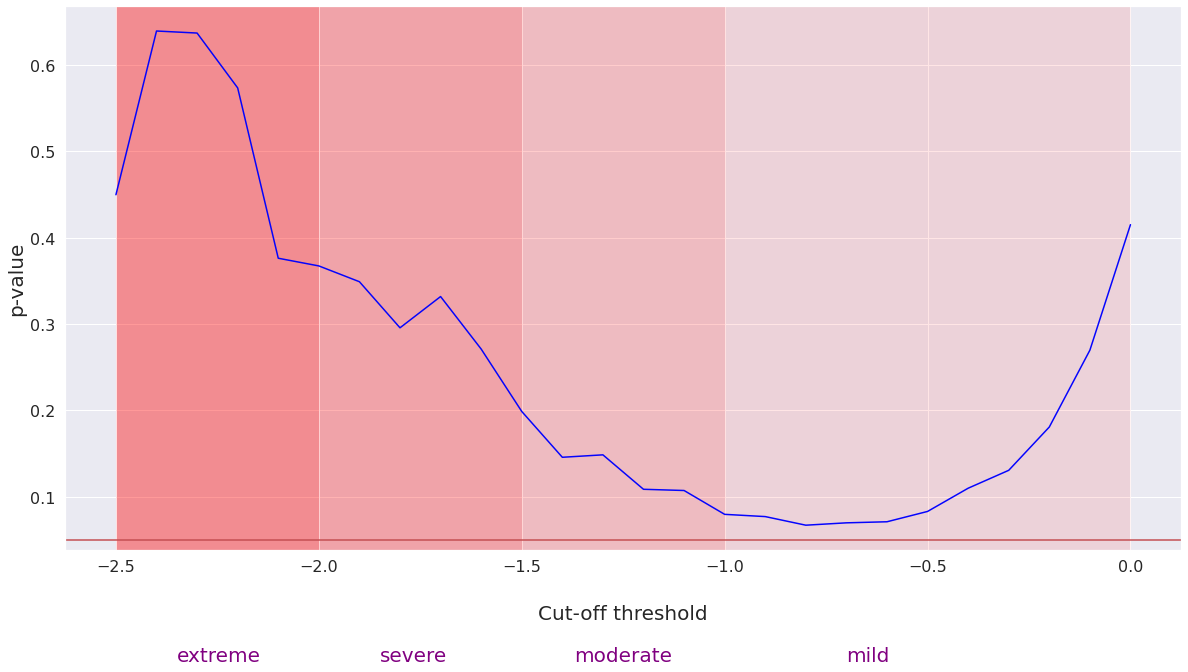

In [183]:
result = np.array(result)
plt.plot(extremes_treshold,result[:,1], color = 'blue', alpha = 6,)
plt.axhline(y=0.05, color='r', linestyle='-')
plt.ylabel("p-value", fontsize = 20)
plt.xlabel("Cut-off threshold", fontsize = 20, labelpad = 30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axvspan(-2.5, -2, facecolor='red', alpha=0.4)
plt.axvspan(-2, -1.5, facecolor='red', alpha=0.3)
plt.axvspan(-1.5, -1, facecolor='red', alpha=0.2)
plt.axvspan(-1, 0, facecolor='red', alpha=0.1)
plt.text(-2.35, -0.09, 'extreme', size=20, color='purple')
plt.text(-1.85, -0.09, 'severe', size=20, color='purple')
plt.text(-1.37, -0.09, 'moderate', size=20, color='purple')
plt.text(-0.7, -0.09, 'mild', size=20, color='purple')
plt.savefig("{}_cutoff_{}_oni.png".format(cc,tau))

In [116]:
#extremes_treshold = -2

train_start = 1950
validation_end  = 2010
temporal_limits = {"time_min":datetime(train_start, 1, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}


cc = "ET"


In [117]:
extremes_treshold = np.arange(-26,0,1)/10
taus = np.arange(1,13)

In [118]:
result = np.zeros((len(taus),len(extremes_treshold)))

In [119]:
oni_t = ff.timeseries_enso('oni.npy', start_year = train_start , end_year=validation_end, base_year = 1950)
temporal_limits = {"time_min":datetime(train_start, 1, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}

for i in range(len(taus)):
    for j in range(len(extremes_treshold)):
        original_count, count = ff.drought_timeseries("{}_gamma_18912015_{}.npy".format(cc,f),train_start,validation_end, extremes_treshold = extremes_treshold[j])
        result[i,j] = ff.crosscorr(original_count,oni_t,taus[i])[1]

In [120]:
import seaborn as sns
sns.set(font_scale=1.3)

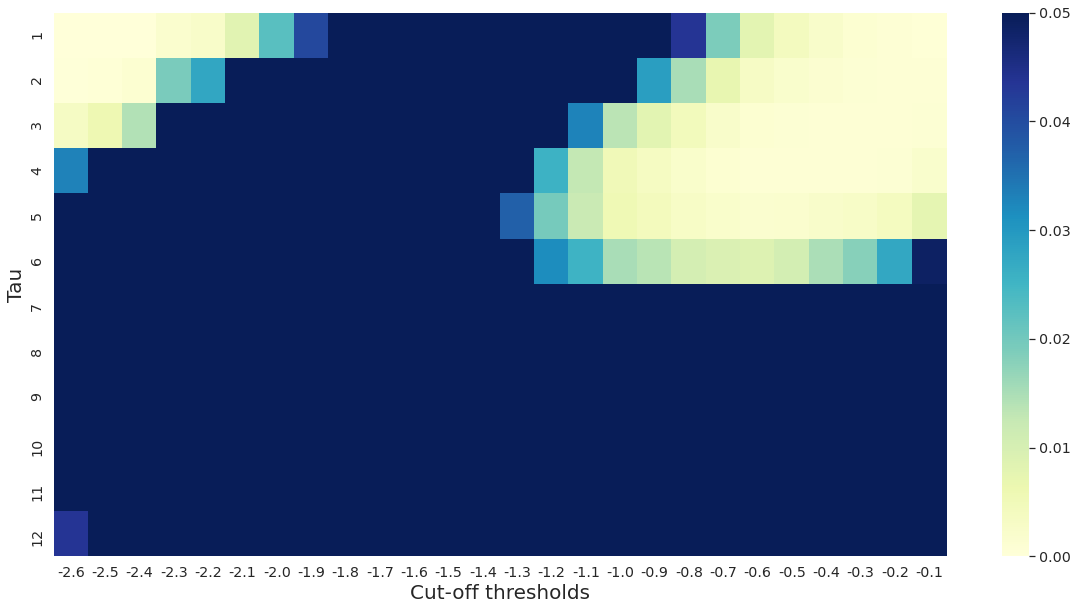

In [121]:
ax = sns.heatmap(result, xticklabels = extremes_treshold, yticklabels = taus, vmin=0, vmax= 0.05, cmap="YlGnBu")
ax.set_xlabel("Cut-off thresholds", fontsize = 20)
ax.set_ylabel("Tau", fontsize = 20)
plt.savefig("{}_heatmap_{}_{}.png".format(cc,train_start,validation_end))

In [24]:
original_count, count = ff.drought_timeseries("{}_gamma_18912015_{}.npy".format(cc,f),train_start,validation_end, extremes_treshold = -2.4)

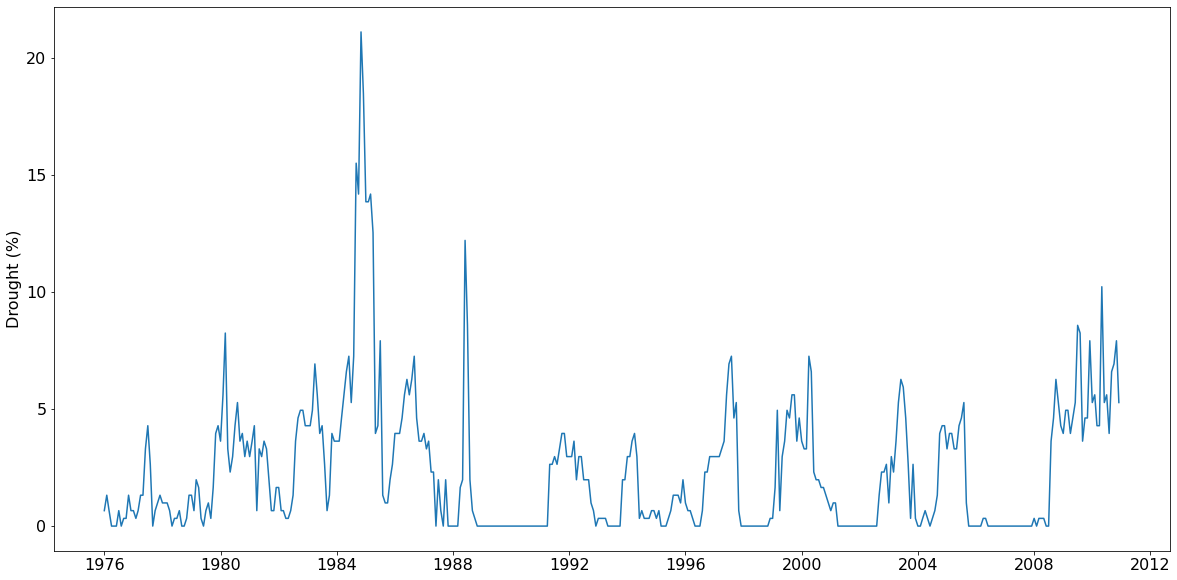

In [25]:
x = np.arange('1976-01', '2011-01', dtype='datetime64[M]')
plt.plot(x, np.array(original_count)*100/303)
plt.ylabel("Drought (%)", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.savefig("ET_cutoff_24.png")

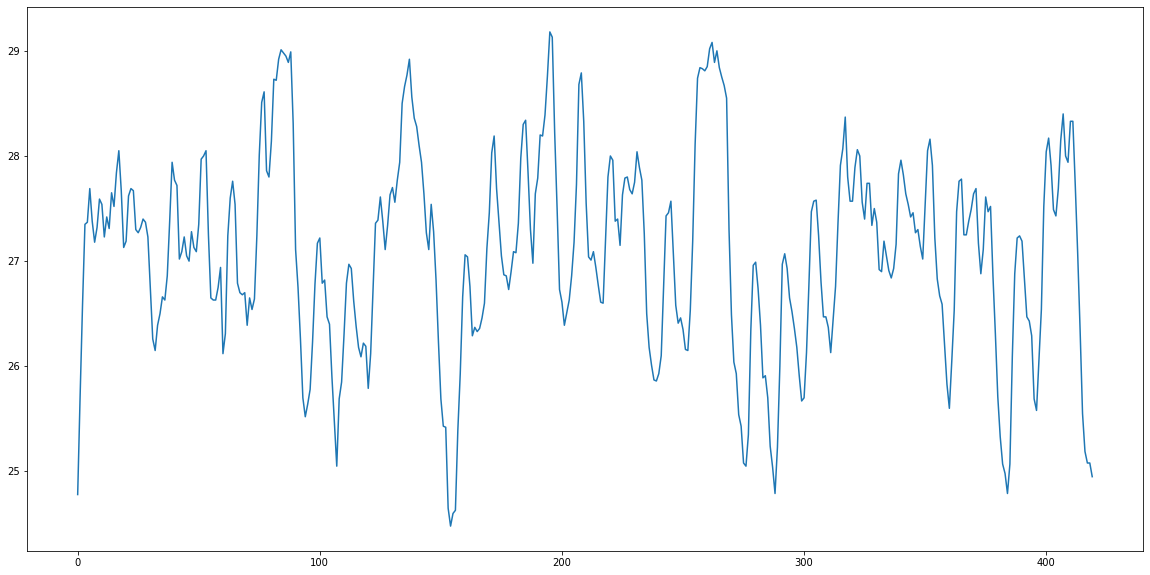

In [41]:
plt.plot(oni_t)

In [126]:
ff.crosscorr(oni, oni_t)

(0.6871882275357316, 7.647271989504936e-60)

In [125]:
oni = ts[:,0]

oni_t = timeseries_enso('nino.npy', start_year = train_start , end_year=validation_end, base_year = 1948)

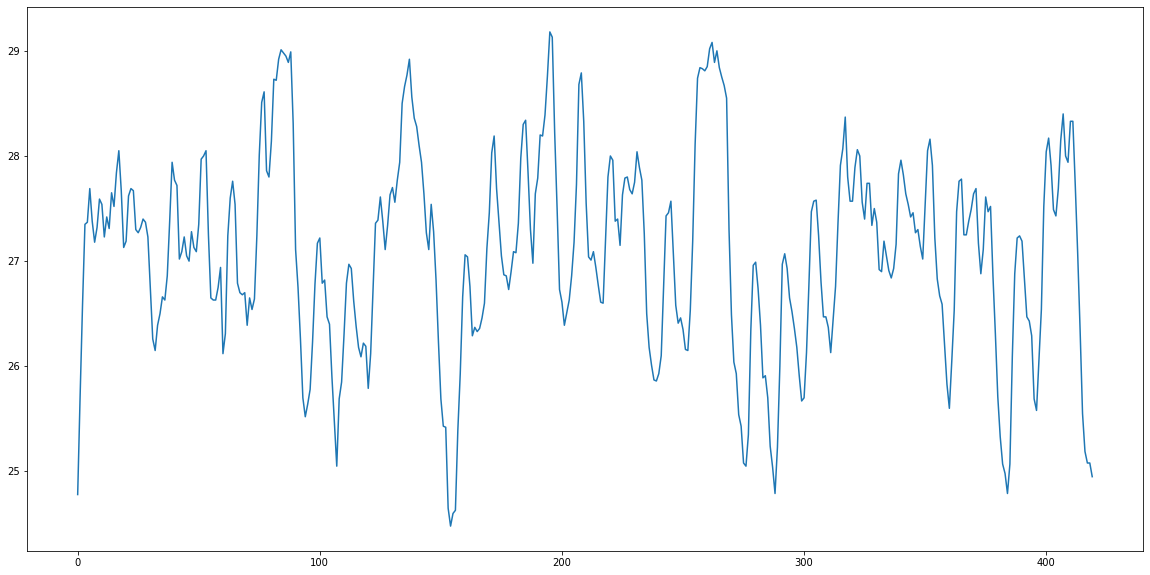

In [128]:
plt.plot(oni_t)

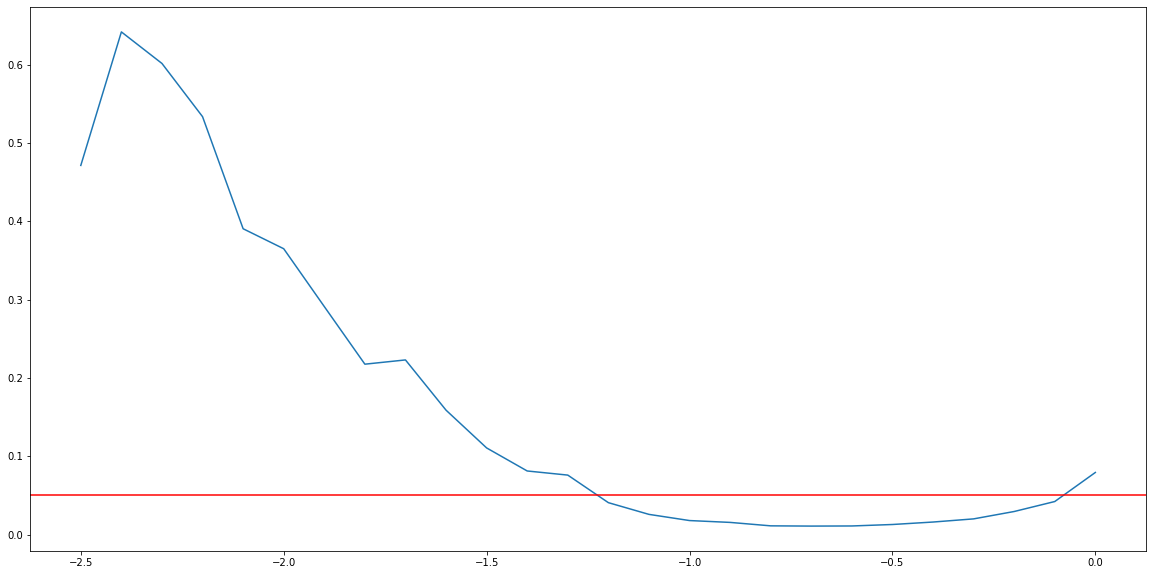

In [267]:
plt.plot(extremes_treshold,result[:,1])
plt.axhline(y=0.05, color='r', linestyle='-')

In [20]:
result

[(0.05477244355095615, 0.13901751787314043),
 (0.07260383899393363, 0.04989367038393676),
 (0.09145100635910923, 0.013506856232428855),
 (0.10341209338685911, 0.005223665652730155),
 (0.10248319002674057, 0.005678712868490234),
 (0.09007243026587748, 0.015194873926204626),
 (0.06514508124592562, 0.07961563244824967),
 (0.033333462166921055, 0.37046063272324115),
 (0.001642756018656886, 0.9648285927073882),
 (-0.021638617215204513, 0.561583267369839),
 (-0.03712836594440729, 0.31946218449484654),
 (-0.044921302363348875, 0.22863655465619462)]

In [268]:
def drought_timeseries_2d(file_name, start_year = 1922, end_year=2015, extremes_treshold = -1, base_year = 1922):
    start_index = (start_year - base_year) * 12
    end_index = start_index + (end_year - (start_year - 1))*12
    ET_gamma = np.load(file_name)
    return(ET_gamma[start_index:end_index,:])

In [281]:
result_agg = []
train_start = 1950
validation_end  = 2010
taus = np.arange(1,13,1)
spi = drought_timeseries_2d("{}_gamma_18912015_{}.npy".format(cc,f),train_start,validation_end)
oni_t = timeseries('nino.npy', start_year = train_start , end_year=validation_end)
for tau in taus:
    result = []
    for i in range(spi.shape[1]):
        result.append(ff.crosscorr(spi[:,i],oni_t,tau))
    result = np.array(result)
    I = result[:,1] < 0.05
    result_agg.append(np.count_nonzero(I)/303)

In [277]:
result = np.array(result)

In [278]:
I = result[:,1] < 0.05

In [279]:
np.count_nonzero(I)/303

0.6237623762376238

In [282]:
result_agg

[0.6237623762376238,
 0.6303630363036303,
 0.6600660066006601,
 0.6534653465346535,
 0.6600660066006601,
 0.6633663366336634,
 0.6666666666666666,
 0.6534653465346535,
 0.6402640264026402,
 0.6600660066006601,
 0.6072607260726073,
 0.5676567656765676]

In [80]:
class_list = np.load("ET_class_list.npy")

In [87]:
class_index = class_list == 'Cwb'

In [88]:
np.count_nonzero(I & class_index)/np.count_nonzero(class_index)

0.5714285714285714

In [74]:
np.count_nonzero(class_index)

117

In [75]:
np.count_nonzero(I & class_index)

67

In [76]:
I & class_index

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True, False,  True,  True,
       False, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False,  True,  True,  True, False, False, False, False,  True,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,